<a href="https://colab.research.google.com/github/ThomasAbeyta/data_exploration_outline/blob/main/Radical_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project *Insert* Data Analysis 

### Problem Definition



# The **RAD** Data 



## IDE
A variety of exploratory analysis tools such as .info() , .keys() .shape etc


*Talk about the intial, unaltered data*

### Collection/Source
Data was collected from the inclass folder. I have not validated the authenticity of the data.

###Data Overview

This data has 1 target column and 49 features. Each feature is anonymous and has no context other then it relates to the target.

The data set has 18000 observations.

### Imports

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

###Mark's Radical Functions

In [ ]:
def show_me(money):
  """Displays info, describe, head, and tail
  
Money in the bank,
Show me the stats and details,
Info, head, tail, done."""
  print('Info')  
  print(money.info())
  print('\n')
  print('\n')
  print('Described')
  print(money.describe().T)
  print('\n')
  print('\n')
  print('Head')
  print(money.head().T)
  print('\n')
  print('\n')
  print('Tail')
  print(money.tail().T)

In [ ]:
def count_nulls(data):
    """Checks for null values and displays only nulls
    
Null values abound,
Display them with a function,
Data cleaning done."""
    temp = data.isna().sum()
    filter = temp > 0
    print(data.shape)
    print(temp[filter])

In [ ]:
show_me?

###Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###File Paths

This file path is for test and training data.

In [ ]:
train_path = '/content/drive/MyDrive/Data_Science_Bootcamp/Projects/Project_1/Data/Train.csv'

To be safe I am going to rename the dataframe so it reminds me what the focus is on. I will also create a copy and a restore option.

In [ ]:
sales = pd.read_csv(train_path)
sales.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [ ]:
sales.shape

(180000, 53)

In [ ]:
#Copy
sales_copy = sales.copy()

##IDA intitial data analaysis

In [ ]:
sales_copy.shape

(180000, 53)

In [ ]:
sales_copy.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [ ]:
sales_copy.tail()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
179995,179995,train_179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,179996,train_179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,179997,train_179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,179998,train_179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760
179999,179999,train_179999,0,11.6252,3.3959,11.5558,4.2003,7.4666,13.7381,12.9590,...,5.0415,-2.4210,-3.6829,14.2422,1.0741,26.3943,4.1482,11.9539,2.9846,15.6002


In [ ]:
sales_copy.describe()

,Unnamed: 0,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.00000,180000.000000,...,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,89999.500000,0.100222,10.678650,-1.630045,10.712922,5.408688,7.566953,14.024017,8.52808,15.243424,...,5.635897,-0.000418,-0.668334,20.208845,2.595090,12.756574,3.236201,7.440715,1.927078,15.870166
std,51961.668564,0.300297,3.041036,4.050519,2.639146,0.866265,1.235043,0.190038,4.64170,7.851050,...,0.369629,4.422915,5.968300,7.132446,2.801692,9.320939,4.561317,3.021636,1.476777,3.010492
min,0.000000,0.000000,0.408400,-15.043400,2.117100,2.347300,3.970500,13.434600,-6.01110,-10.664200,...,4.258800,-14.506000,-22.748700,-2.995300,-7.856100,-18.489700,-14.093300,-2.691700,-3.814500,6.299300
25%,44999.750000,0.000000,8.451675,-4.745600,8.720000,4.768500,6.618800,13.893900,5.06575,9.170200,...,5.374200,-3.253575,-4.997500,15.062900,0.628600,5.661300,-0.062000,5.160325,0.890000,13.830400
50%,89999.500000,0.000000,10.526750,-1.611250,10.579600,5.385600,7.628500,14.025500,8.59920,15.198900,...,5.634500,0.008500,-0.560300,20.203300,2.513800,12.520300,3.204650,7.350950,1.899700,15.934600
75%,134999.250000,0.000000,12.756200,1.360225,12.514100,6.003200,8.583800,14.164400,12.27330,21.010500,...,5.905600,3.098325,3.632525,25.639125,4.396725,19.461725,6.409900,9.511125,2.947225,18.061425
max,179999.000000,1.000000,20.315000,10.376800,19.353000,8.447700,11.150600,14.654500,22.33150,41.748000,...,7.089000,16.731900,18.855400,43.546800,13.448700,44.363400,18.440900,16.716500,8.402400,26.079100


In [ ]:
sales_copy.columns.sort

<bound method Index.sort of Index(['Unnamed: 0', 'ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3',
       'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_10',
       'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_17',
       'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24',
       'var_25', 'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31',
       'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37', 'var_38',
       'var_39', 'var_40', 'var_41', 'var_42', 'var_43', 'var_44', 'var_45',
       'var_46', 'var_47', 'var_48', 'var_49'],
      dtype='object')>

From this initial data analysis I can see that there is a lot of data. 49 features and 18000 observations. the features use names that do not reveal anything usefull at this time. 

### Data Cleaning

I am going to look for nulls and see if there are columns or rows I can drop

In [ ]:
sales_copy.isna().sum()

Unnamed: 0    0
ID_code       0
target        0
var_0         0
var_1         0
var_2         0
var_3         0
var_4         0
var_5         0
var_6         0
var_7         0
var_8         0
var_9         0
var_10        0
var_11        0
var_12        0
var_13        0
var_14        0
var_15        0
var_16        0
var_17        0
var_18        0
var_19        0
var_20        0
var_21        0
var_22        0
var_23        0
var_24        0
var_25        0
var_26        0
var_27        0
var_28        0
var_29        0
var_30        0
var_31        0
var_32        0
var_33        0
var_34        0
var_35        0
var_36        0
var_37        0
var_38        0
var_39        0
var_40        0
var_41        0
var_42        0
var_43        0
var_44        0
var_45        0
var_46        0
var_47        0
var_48        0
var_49        0
dtype: int64

Since this data seems to be complete and does not need any cleaning that I can tell at this time I am going to leave it. Perhaps with a correlation matrix I can remove some columns.

###Check target
Since 'target' is our target I am going to check to see if there are any unwanted values from 1's and 0's.

In [ ]:
sales_copy['target'].value_counts()

0    161960
1     18040
Name: target, dtype: int64

The target values look good and give me an insight about the data being skewed and that might be important later on. 

###One-hot encoding
If there were any values that were not numerical I would need to convert them to a represenative number but it does not need this on this data.

I just realized that 'ID_code' and 'Unnamed: 0' columns are the same as our index so I am going to drop them.

In [ ]:
sales_copy.drop('Unnamed: 0', axis=1, inplace=True)
sales_copy

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,train_179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,22.3368,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,train_179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,16.0279,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,train_179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,15.2717,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,train_179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,20.4504,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760


In [ ]:
sales_copy.drop('ID_code', axis=1, inplace=True)
sales_copy

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,22.3368,11.4176,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,16.0279,15.7685,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,15.2717,7.7995,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,20.4504,29.9869,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760


What pops out to me at this stage is that we have a large data set of 18000 observationsa and 49 anonymous features that we have to try to make predictions against. The data set has zero null values and is very well maintained 

#EDA

##Makins sense of the data
At this stage I can see that our target is represented by 1's as succesfull transaction and 0's as unsucessful transactions. I am going to see the sucessful from unsucessfull. 

In [ ]:
sum(sales_copy['target']*100/len(sales_copy['target']))

10.0222222222236

We can see that only 10% of the data has sucessful transaction. This tells me that the data is skewed and a linear regression may not be a good model to use on this data set. 

##Correlation and down sampling
Since we are unable to make any assumptions based on the feature name of a specific feature possible high correlation to the target, we will plot a correlation plot. But because the data is so large I am going to pull a random sample of 500

In [ ]:
sales_sample = sales_copy.sample(n=500, random_state=42)
sales_sample.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
123137,0,8.7407,7.4410,8.6438,4.0017,8.2295,13.9343,10.2587,20.7466,29.0224,...,5.4005,-2.9749,-5.6691,26.0971,5.9788,4.2753,-1.6529,6.8150,2.5942,11.5541
130504,0,10.4870,0.9360,8.4550,6.7427,6.8095,14.3317,9.8163,14.6211,9.4484,...,5.6769,1.7667,5.5710,18.3658,1.3244,22.2363,-2.6656,3.8852,0.8013,17.6893
31166,0,14.0538,0.7937,13.6662,6.2554,9.2136,14.0320,2.2485,9.5204,25.1450,...,5.5457,6.1118,1.4558,17.7790,2.6514,4.4671,9.8575,3.2389,3.5709,14.3783
26262,1,9.4721,-6.4177,11.9786,5.4148,7.7053,14.2183,12.7253,17.1337,16.6800,...,4.9849,2.3272,4.2617,2.6396,4.2959,17.7760,2.7551,7.0335,2.3176,14.0900
64868,0,8.5652,4.0393,14.9835,4.7920,6.7364,13.9528,13.4805,23.0005,12.3458,...,5.7387,-1.1402,-0.9484,4.4166,4.6047,-2.1732,6.2085,10.7421,1.4173,8.4698


<AxesSubplot:>

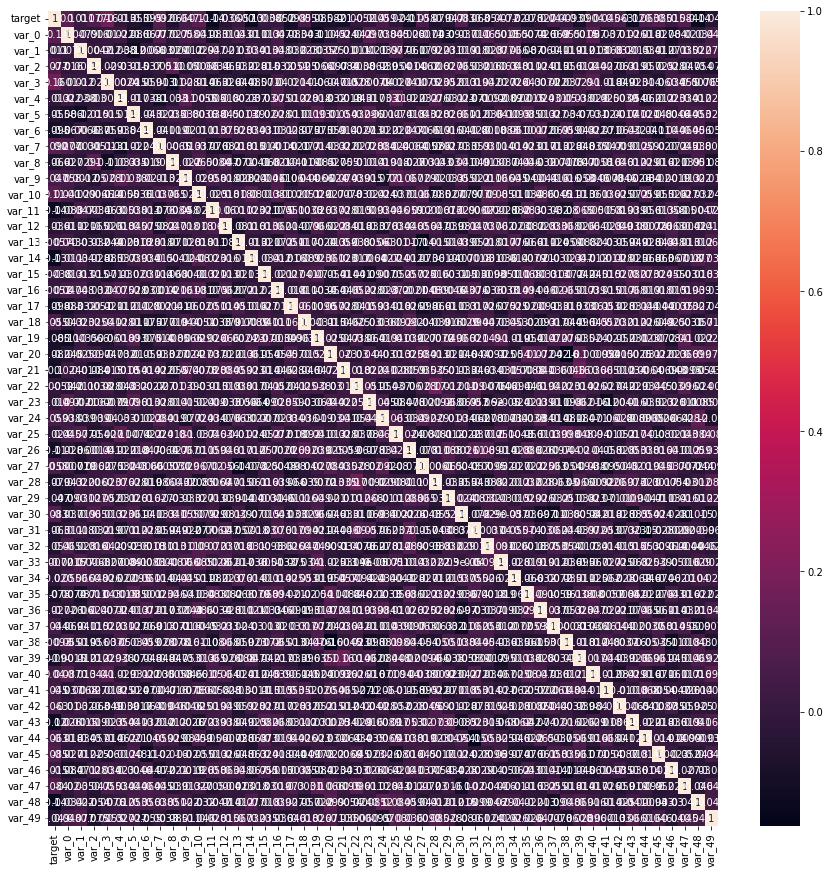

In [ ]:
plt.figure(figsize=(15,15))
corr_sample = sales_sample.corr()
sns.heatmap(data=corr_sample, annot=True)

since I only care about high correlation, I made a filter to show only values with a correlation of .7 and above. I also used the entire data set since the processing would be faster.

In [ ]:
corr_matrix = sales_copy.corr()
high_corr = np.abs(corr_matrix) > .65
print(high_corr)

        target  var_0  var_1  var_2  var_3  var_4  var_5  var_6  var_7  var_8  \
target    True  False  False  False  False  False  False  False  False  False   
var_0    False   True  False  False  False  False  False  False  False  False   
var_1    False  False   True  False  False  False  False  False  False  False   
var_2    False  False  False   True  False  False  False  False  False  False   
var_3    False  False  False  False   True  False  False  False  False  False   
var_4    False  False  False  False  False   True  False  False  False  False   
var_5    False  False  False  False  False  False   True  False  False  False   
var_6    False  False  False  False  False  False  False   True  False  False   
var_7    False  False  False  False  False  False  False  False   True  False   
var_8    False  False  False  False  False  False  False  False  False   True   
var_9    False  False  False  False  False  False  False  False  False  False   
var_10   False  False  False

I went from .7 to .02 This turned out to be unhelpful so I went with a graph instead

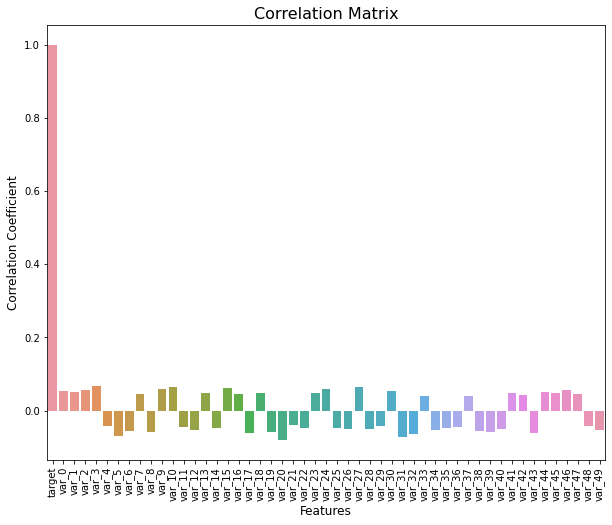

In [ ]:
# Compute the correlation matrix between all features and the target variable
corr_matrix = sales_copy.corr()['target']

fig, ax = plt.subplots(figsize=(10, 8))
corr_plot = sns.barplot(x=corr_matrix.index, y=corr_matrix.values, ax=ax)

# Set the plot title and axis labels
ax.set_title('Correlation Matrix', fontsize=16)
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Correlation Coefficient', fontsize=12)

# Rotate the x-axis labels for better readability
corr_plot.set_xticklabels(corr_plot.get_xticklabels(), rotation=90)

# Show the plot
plt.show()

Based on this graph, there is not any features that shows to have a strong correlation coefficient with the target.

#Data Processing


###Gaussian Naive_Bayes Model

In this process we will use Guassian Naive Bayes model to try to pridect,  since the feautres shows that their is no correlation with each other and normal distribution. We will also want to make sure that the targets are balanced(unbiased)

- Is the customer satisfied?
- Will the customer buy the product?
- Can the customer pay the loan?

First we will shorten the method name with a variable and then split our target from features of our 500 sample size data set.

In [ ]:
gnb = GaussianNB() 

In [ ]:
y = sales_sample['target'].copy()
X = sales_sample.drop('target', axis = 1, inplace=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))


Number of mislabeled points out of a total 100 points : 9


###Cross-Validation
Next we will store the accuracy results of the Guassian Naive Model in a variable to record results after tweaking the model.

We are going to evaluate the Guassian Naive Model used above with a report generating precision, recall, and F1-score for each class. 

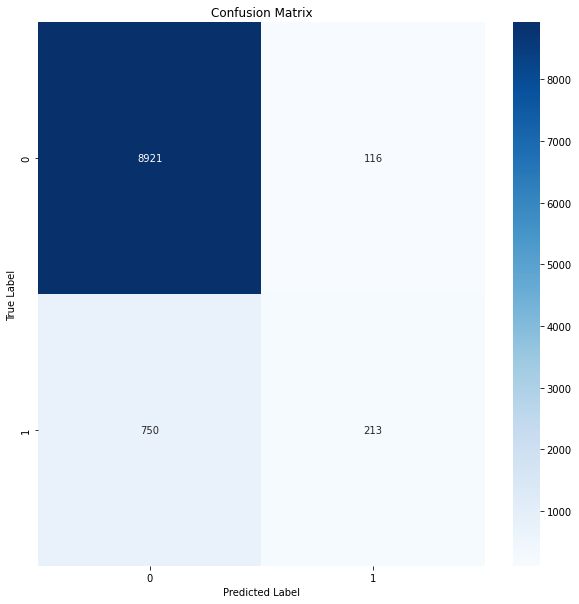

[[8921  116]
 [ 750  213]]


In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
# Create a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Set the plot title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()
print(cm)

We can see that the model performs well on transactions that did not go through and not so well on successfull transactions

In [ ]:
accuracy_scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    mislabeled_points = (y_test != y_pred).sum()
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    #print("Accuracy score for iteration {}: {:.2f}%".format(i+1, accuracy*100))

mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
print("Mean accuracy score: {:.2f}%".format(mean_accuracy*100))
print("Standard deviation: {:.2f}".format(std_accuracy))
print('Number of mislabeled points: %d' % mislabeled_points)

Mean accuracy score: 88.99%
Standard deviation: 0.03
Number of mislabeled points: 11


Text(20.200000000000003, 0.5, 'count')

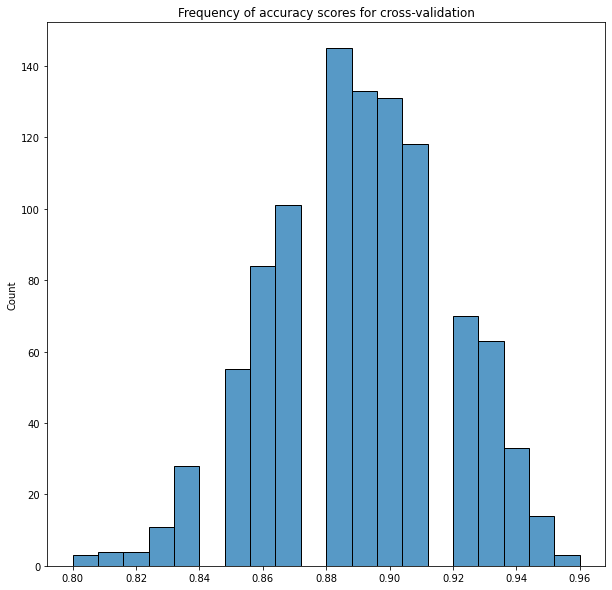

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Frequency of accuracy scores for cross-validation')
sns.histplot(accuracy_scores);

ax.set_title('Accuracy Score', fontsize=16)
ax.set_xlabel('Score', fontsize=12)
ax.set_ylabel('count', fontsize=12)

From generating random train/test through each itereation of the sample set we see that our model performed fairly well. We got a mean accuracy score of 88.98% meaning that it was 88.9% accurate through 1000 itereations. Between each iteration we have a standard deviation of .03 saying we were precise through the tests. A total number of 11 mislabeled points is a low number when considering our iterations was 1000.

In the next test I am going to run a larger sample size. Since we have a data set of 180,000 observations I will attempt to do a jump in data by 2 orders of magnitude.

In [ ]:
sales_sample2 = sales_copy.sample(n=50000, random_state=42)
sales_sample2.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
123137,0,8.7407,7.4410,8.6438,4.0017,8.2295,13.9343,10.2587,20.7466,29.0224,...,5.4005,-2.9749,-5.6691,26.0971,5.9788,4.2753,-1.6529,6.8150,2.5942,11.5541
130504,0,10.4870,0.9360,8.4550,6.7427,6.8095,14.3317,9.8163,14.6211,9.4484,...,5.6769,1.7667,5.5710,18.3658,1.3244,22.2363,-2.6656,3.8852,0.8013,17.6893
31166,0,14.0538,0.7937,13.6662,6.2554,9.2136,14.0320,2.2485,9.5204,25.1450,...,5.5457,6.1118,1.4558,17.7790,2.6514,4.4671,9.8575,3.2389,3.5709,14.3783
26262,1,9.4721,-6.4177,11.9786,5.4148,7.7053,14.2183,12.7253,17.1337,16.6800,...,4.9849,2.3272,4.2617,2.6396,4.2959,17.7760,2.7551,7.0335,2.3176,14.0900
64868,0,8.5652,4.0393,14.9835,4.7920,6.7364,13.9528,13.4805,23.0005,12.3458,...,5.7387,-1.1402,-0.9484,4.4166,4.6047,-2.1732,6.2085,10.7421,1.4173,8.4698


In [ ]:
y = sales_sample2['target'].copy()
X = sales_sample2.drop('target', axis = 1, inplace=False)

In [ ]:
accuracy_scores = []
for i in range(1,1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    mislabeled_points = (y_test != y_pred).sum()
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    #print("Accuracy score for iteration {}: {:.2f}%".format(i+1, accuracy*100))

mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
print("Mean accuracy score: {:.2f}%".format(mean_accuracy*100))
print("Standard deviation: {:.2f}".format(std_accuracy))
print('Number of mislabeled points: %d' % mislabeled_points)

Mean accuracy score: 91.01%
Standard deviation: 0.00
Number of mislabeled points: 866


In [ ]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))
#accuracy_score[i] = metrics.accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

Number of mislabeled points out of a total 10000 points : 866
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      9037
           1       0.65      0.22      0.33       963

    accuracy                           0.91     10000
   macro avg       0.78      0.60      0.64     10000
weighted avg       0.90      0.91      0.89     10000




Mean accuracy score: 91.01%
Standard deviation: 0.00
Number of mislabeled points: 866

Based off these numbers we see get almost a 2% increase in accuracy on a larger sample. The standard deviation dropping is expected since we have more points evenly distrubuted. I am also surprised on the mislabeled points. Since we increased the data by 1000 times we could think there would be a 1000 increase in mislabeled points 11,000. Instead we get .5% decrease. (11/500)-(866/50000)

Text(20.200000000000003, 0.5, 'count')

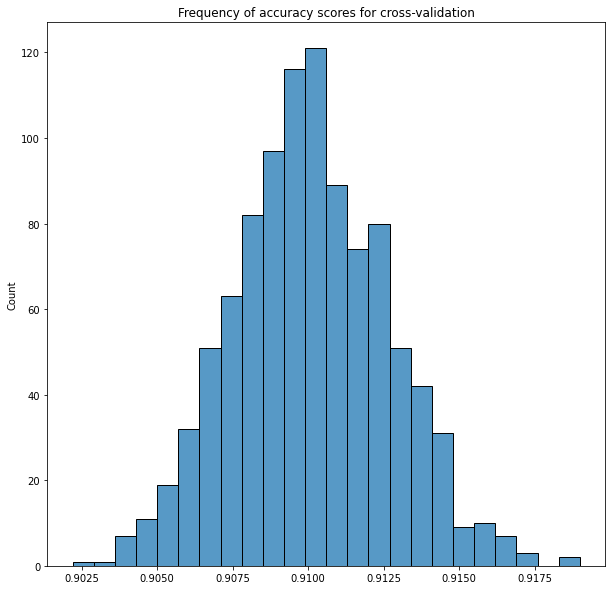

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Frequency of accuracy scores for cross-validation')
sns.histplot(accuracy_scores);

ax.set_title('Accuracy Score', fontsize=16)
ax.set_xlabel('Score', fontsize=12)
ax.set_ylabel('count', fontsize=12)


Next I am going to run a Receiver Operating Characteristic so I can see the number of true positive against false positives. 

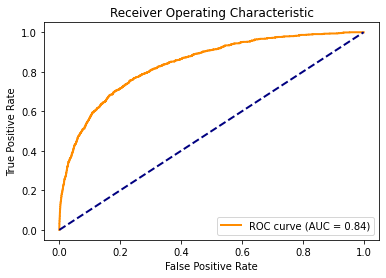

In [ ]:
# Make predictions on the test data and compute the ROC curve
y_score = gnb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

I am not completely confident in how this evaluation works but I read that a roc evaluation is a good way to evaluate binary classification model. My understanding of this graph is that a ROC curve going up and to the right was a good because it says the number of true positives against false positive are higher. A score of .5 is indistinguishable from random. A score of .84 shows that the model can distinguish between classes of successfull and unsucessfull transactions.

###Further Analysis

Additionally I ran a few extra models to try to make more sense of the features.  The PCA is mostly over my head but I was told it can help to identify the most important features or directions in the data, which can be useful for understanding the underlying structure of the data. 

In [ ]:
#standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(sales_sample2)

# Apply PCA with 2 components
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data_pca

array([[-0.11640071, -0.26885108],
       [-0.88879741,  0.48267366],
       [ 1.11655763,  0.29706577],
       ...,
       [-0.49626831,  0.32208963],
       [-1.09379299, -0.33062997],
       [ 0.33150167, -0.24519983]])

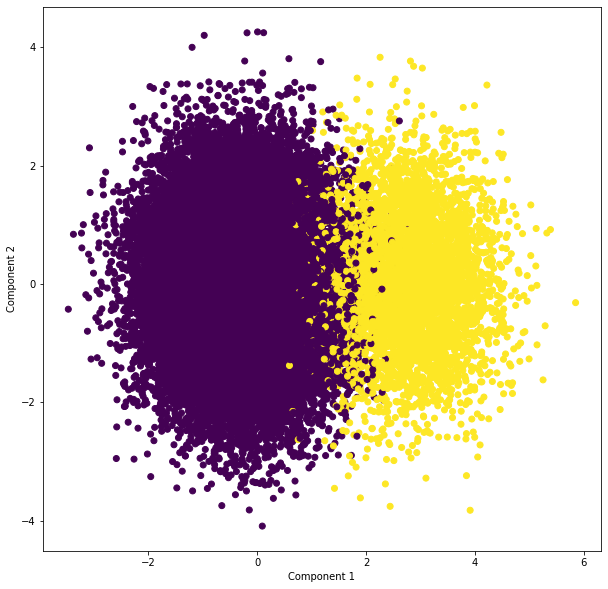

In [ ]:
# Visualize the data
plt.figure(figsize=(10,10))
plt.scatter(data_pca[:,0], data_pca[:,1], c=sales_sample2['target'])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [ ]:
# Fit a decision tree classifier to the training data
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Get the feature importances
importances = dtc.feature_importances_

# Get the indices of the most important features
indices = np.argsort(importances)[::-1]

# Print the most important features and their importances
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 27 (0.027305)
2. feature 31 (0.026819)
3. feature 4 (0.024164)
4. feature 46 (0.023964)
5. feature 43 (0.023596)
6. feature 22 (0.022954)
7. feature 18 (0.022757)
8. feature 20 (0.022700)
9. feature 45 (0.022642)
10. feature 5 (0.022537)
11. feature 8 (0.022413)
12. feature 2 (0.022362)
13. feature 1 (0.022329)
14. feature 24 (0.022184)
15. feature 38 (0.021447)
16. feature 44 (0.021360)
17. feature 10 (0.021149)
18. feature 42 (0.021046)
19. feature 36 (0.020713)
20. feature 30 (0.020644)
21. feature 0 (0.020558)
22. feature 26 (0.020529)
23. feature 35 (0.020187)
24. feature 39 (0.020150)
25. feature 19 (0.020042)
26. feature 25 (0.019875)
27. feature 17 (0.019840)
28. feature 11 (0.019729)
29. feature 7 (0.019723)
30. feature 15 (0.019635)
31. feature 48 (0.019485)
32. feature 32 (0.019357)
33. feature 47 (0.019130)
34. feature 21 (0.018884)
35. feature 28 (0.018722)
36. feature 41 (0.018697)
37. feature 14 (0.018615)
38. feature 6 (0.018539)
39. feature 

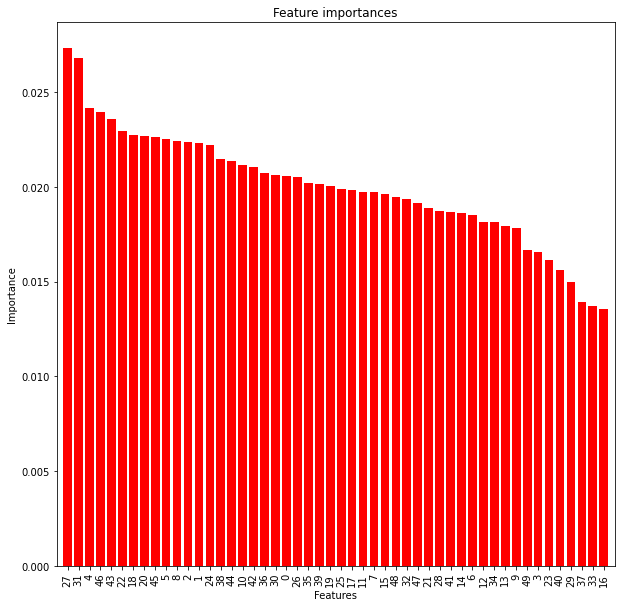

In [ ]:
# Plot the feature importances
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Conclusion



##Key Takeaways:

In this project, the goal was to explore the possibility of predicting customer behavior based on a set of features. The features include information about whether the customer is satisfied, likely to buy the product, or able to pay back a loan. Initially, it was assumed that without context to the features, predictions could not be substantiated. However, to my surprise, the features were highly predictive of the target variable. Using a GuassianNB Model I was able to predict with 91% accuracy whether a customer would complete a transaction using the given features.

However, there was not enough information to evaluate customer satisfaction without a customer ID and associated dates. To evaluate satisfaction, I would need to compare frequency and possible trends in features when purchases are grouped in tighter time frames. 

The data being vague I could assume if the data set shows transactions from a loan, then I could predict with 91% accuracy whether the loan would be repaid based on the companies ability to obtain the exact features ahead of time for a particular customer.


##Model Performance

The Gaussian Naive Bayes model performed well for a low-consequence situation, such as predicting transaction probability. However, if this was a medical test, a 91% accuracy rate would likely be too low to be considered reliable.

##Future exploration/ Next steps

In future work, I would like to explore how accuracy changes when variables are removed in descending ranked order. This analysis could help identify which features are the most important predictors of the target variable and improve the model's accuracy.

